# Final Project

This is the python script to predict the date when the world will achieve herd immunity for COVID-19

In [49]:
# Load and process data
import pandas as pd
from datetime import datetime

# read data from csv file
df = pd.read_csv(r'country_vaccinations.csv')

# extract data we need
iso_code = df.iso_code
date = df.date
tvph = df.total_vaccinations_per_hundred
pfvph = df.people_fully_vaccinated_per_hundred
# print(iso_code)
# print(date)
# print(tvph)
# print(pfvph)

In [295]:
# In this section the data will be put into two sorted dictionary to fit into the model

total_date = {}

for i in range(14994):
    if tvph[i] != -1:
        iso_date = "20"
        split_date = date[i].split("/")
        iso_date = iso_date + split_date[2] + "-"
        if len(split_date[0]) == 1:
            iso_date += "0"
        iso_date = iso_date + split_date[0] + "-"
        if len(split_date[1]) == 1:
            iso_date += "0"
        iso_date += split_date[1]
        date_timestamp = datetime.fromisoformat(iso_date).timestamp()
        if date_timestamp not in total_date.keys():
            total_date[date_timestamp] = []
        total_date[date_timestamp].append(tvph[i])

for key in total_date.keys():
    total_value = 0
    length = len(total_date[key])
    for temp in total_date[key]:
        total_value += temp
    average = total_value/length
    total_date[key] = average

# print(total_date.keys())
total_sorted = {}

for key in sorted(total_date.keys()):
    total_sorted[key] = total_date[key]
    
# print(total_sorted.keys())

people_date = {}

for i in range(14994):
    if pfvph[i] != -1:
        iso_date = "20"
        split_date = date[i].split("/")
        iso_date = iso_date + split_date[2] + "-"
        if len(split_date[0]) == 1:
            iso_date += "0"
        iso_date = iso_date + split_date[0] + "-"
        if len(split_date[1]) == 1:
            iso_date += "0"
        iso_date += split_date[1]
        date_timestamp = datetime.fromisoformat(iso_date).timestamp()
        if date_timestamp not in people_date.keys():
            people_date[date_timestamp] = []
        people_date[date_timestamp].append(pfvph[i])

for key in people_date.keys():
    total_value = 0
    length = len(people_date[key])
    for temp in people_date[key]:
        total_value += temp
    average = total_value/length
    people_date[key] = average
    
# print(people_date.keys())

people_sorted = {}

for key in sorted(people_date.keys()):
    people_sorted[key] = people_date[key]

Explained Variance Score:  0.964376434428747
Expected date of herd immunity:  2022-08-20 05:01:16.348340


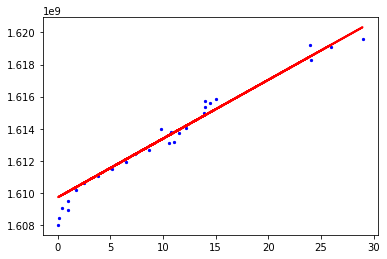

In [308]:
# In this section we fit total vaccination per hundred data into the SVM

total_x = []
total_y = []

for key in total_sorted.keys():
    total_x.append([total_sorted[key]])
    total_y.append(key)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, train_size = 0.8, shuffle=True)

from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

svr = SVR(kernel = 'linear', C=800, epsilon = 0.01)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score

acc_evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score: ", acc_evs)
print("Expected date of herd immunity: ", datetime.fromtimestamp(svr.predict([[140]])[0]))
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, s=5, color="blue", label="original")
plt.plot(X_test, y_pred, lw=2, color="red", label="fitted")


Explained Variance Score:  0.9607180800857309
Expected date of herd immunity:  2022-12-30 08:48:57.154272


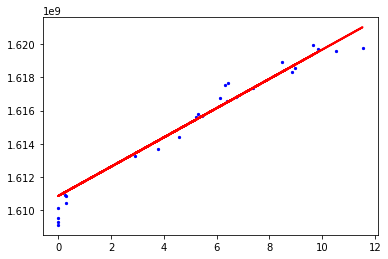

In [320]:
# In this section we fit people fully vaccinated per hundred into the SVM

total_x = []
total_y = []

for key in people_sorted.keys():
    total_x.append([people_sorted[key]])
    total_y.append(key)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(total_x, total_y, train_size = 0.8, shuffle=True)

from sklearn.svm import SVR
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

svr = SVR(kernel = 'linear', C=8000, epsilon = 0.01)
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import explained_variance_score

acc_evs = explained_variance_score(y_test, y_pred)
print("Explained Variance Score: ", acc_evs)
print("Expected date of herd immunity: ", datetime.fromtimestamp(svr.predict([[70]])[0]))
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test, s=5, color="blue", label="original")
plt.plot(X_test, y_pred, lw=2, color="red", label="fitted")
